# Tasneem Hosen Syriatel Take Home Assignment Final
## Poblem: predict the Salary for the Position


- **First part:** the code used to solve the prediction problem.

## Define the dataset path

In [47]:
# %load_ext autoreload
# %autoreload 2

# # This code to link colab to a drive account
# from google.colab import drive
# drive.mount('/content/drive/')

# import os
# os.chdir('/content/drive/My Drive/task/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


- **Our dataset name:** jobs_train.csv you can download it [link text](https://drive.google.com/file/d/1wfgEKq0V5XdUjP2rFnPFGpwBRKxNcUtb/view?usp=sharing)

## Import needed packages

In [48]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

import numpy as np
import seaborn as sns
import copy

import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd 

## Reading and discovering the dataset

In [49]:
# read the dataset
# data_path = 'jobs_train.csv'
#jobs_train_df = pd.read_csv(data_path)
jobs_train_df = pd.read_csv('jobs_train.csv')

# print the first 5 rows
jobs_train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362685006848,COMP14,MANAGER,MASTERS,MATH,FINANCE,24,36,158
1,JOB1362685403468,COMP36,JANITOR,NONE,NONE,FINANCE,3,4,73
2,JOB1362684563560,COMP56,MANAGER,HIGH_SCHOOL,NONE,SERVICE,11,23,103
3,JOB1362684814664,COMP28,JANITOR,NONE,NONE,EDUCATION,22,42,63
4,JOB1362685123815,COMP48,CEO,DOCTORAL,NONE,OIL,15,66,129


In [50]:
## Looking for missing data
jobs_train_df.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [51]:
# discover the dataset shape, number of samples and features
print(f'Number of samples {jobs_train_df.shape[0]}')
print(f'Number of features {jobs_train_df.shape[1]}')

Number of samples 900000
Number of features 9


In [52]:
# print out the dataset describtion
jobs_train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,900000.000000,900000.000000,900000.000000
mean,11.991183,49.525906,116.067520
std,7.211222,28.883348,38.717799
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [53]:
# discover the data types in our dataset
jobs_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                900000 non-null  object
 1   companyId            900000 non-null  object
 2   jobType              900000 non-null  object
 3   degree               900000 non-null  object
 4   major                900000 non-null  object
 5   industry             900000 non-null  object
 6   yearsExperience      900000 non-null  int64 
 7   milesFromMetropolis  900000 non-null  int64 
 8   salary               900000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 61.8+ MB


In [54]:
categorical_columns

['companyId', 'jobType', 'degree', 'major', 'industry']

In [56]:
# print out the number of unique values in object data types
categorical_columns
for column in categorical_columns:
  print (f'The number of {column} unique values:', len(jobs_train_df[column].unique()))

The number of companyId unique values: 63
The number of jobType unique values: 8
The number of degree unique values: 5
The number of major unique values: 9
The number of industry unique values: 7


In [57]:
# jobID all are unique
print ('The number of jobId unique values:', len(jobs_train_df['jobId'].unique()))

The number of jobId unique values: 900000


## Our target info

In [60]:
# salary min and max
print ('The minimum salary value is: ',jobs_train_df.salary.min())
print ('The maximum salary value is: ',jobs_train_df.salary.max())
#find where salary == 0
print('*************************')
print('The records with salary == 0')
jobs_train_df.loc[jobs_train_df["salary"]==0]

The minimum salary value is:  0
The maximum salary value is:  301
*************************
The records with salary == 0


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
17780,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
331320,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0
362948,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
537203,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
807172,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0


## Data Preparation

- convert all object data type features to categorical

In [61]:
# this function is to iterate over dataset specfied column to change them to category data type
def convert_to_category(df, col_list):
    for column in col_list:
        df[column] = df[column].astype('category')
    return df

In [62]:
convert_to_category(jobs_train_df, ['companyId', 'jobType', 'degree', 'major', 'industry'])
jobs_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   jobId                900000 non-null  object  
 1   companyId            900000 non-null  category
 2   jobType              900000 non-null  category
 3   degree               900000 non-null  category
 4   major                900000 non-null  category
 5   industry             900000 non-null  category
 6   yearsExperience      900000 non-null  int64   
 7   milesFromMetropolis  900000 non-null  int64   
 8   salary               900000 non-null  int64   
dtypes: category(5), int64(3), object(1)
memory usage: 31.8+ MB


- Drop unnecessary columns

In [63]:
# Drop Unnecessary Columns
jobs_train_df = jobs_train_df.drop(columns=['jobId'])

- Remove recordes with salary = 0

In [64]:
# remove recordes with salary = 0
jobs_train_df = jobs_train_df.drop(jobs_train_df[jobs_train_df['salary']==0].index)
jobs_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899995 entries, 0 to 899999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   companyId            899995 non-null  category
 1   jobType              899995 non-null  category
 2   degree               899995 non-null  category
 3   major                899995 non-null  category
 4   industry             899995 non-null  category
 5   yearsExperience      899995 non-null  int64   
 6   milesFromMetropolis  899995 non-null  int64   
 7   salary               899995 non-null  int64   
dtypes: category(5), int64(3)
memory usage: 31.8 MB


In [65]:
jobs_train_df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP14,MANAGER,MASTERS,MATH,FINANCE,24,36,158
1,COMP36,JANITOR,NONE,NONE,FINANCE,3,4,73
2,COMP56,MANAGER,HIGH_SCHOOL,NONE,SERVICE,11,23,103
3,COMP28,JANITOR,NONE,NONE,EDUCATION,22,42,63
4,COMP48,CEO,DOCTORAL,NONE,OIL,15,66,129


## Features Analyze and Visualization 

### 1- Salary Distribution
plot density plot and boxplot in order to discover our target distribution 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


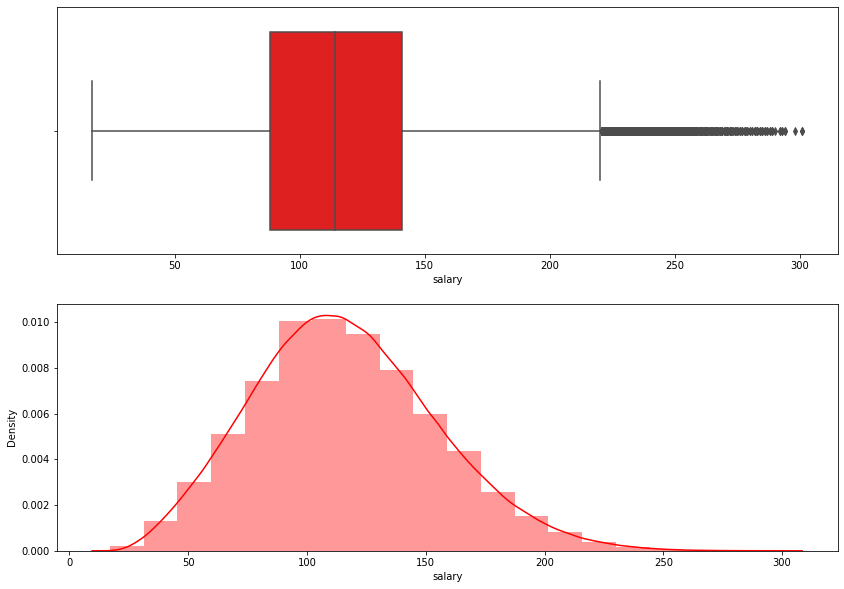

In [66]:
plt.figure(figsize = (14,10))
plt.subplot(2,1,1)
sns.boxplot(jobs_train_df.salary, color = 'red')
plt.subplot(2,1,2)
sns.distplot(jobs_train_df['salary'], bins = 20, color = 'red')
plt.show()

### 2- Fetures Distribution

- For each categorical feature we are going to plot the feature distribution in two cases

  a. Feture distribution among the dataset

  b. Feture distribution with our target (salary)

- For each numerical feature we are going to plot the feature distribution in two cases:

  a.	Feature distribution among the dataset (density plot)

  b.	Feature distribution with our target (salary) (boxplot)


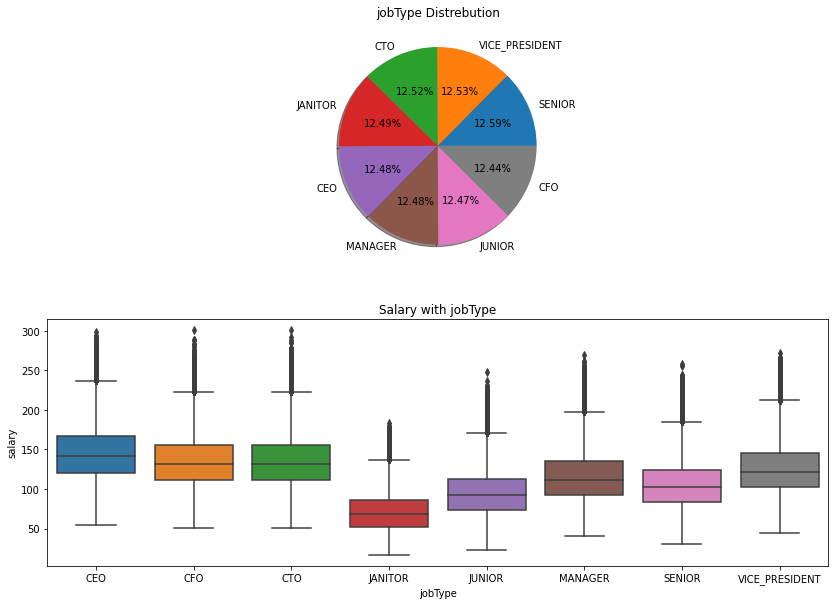

******************************************************************************************************************


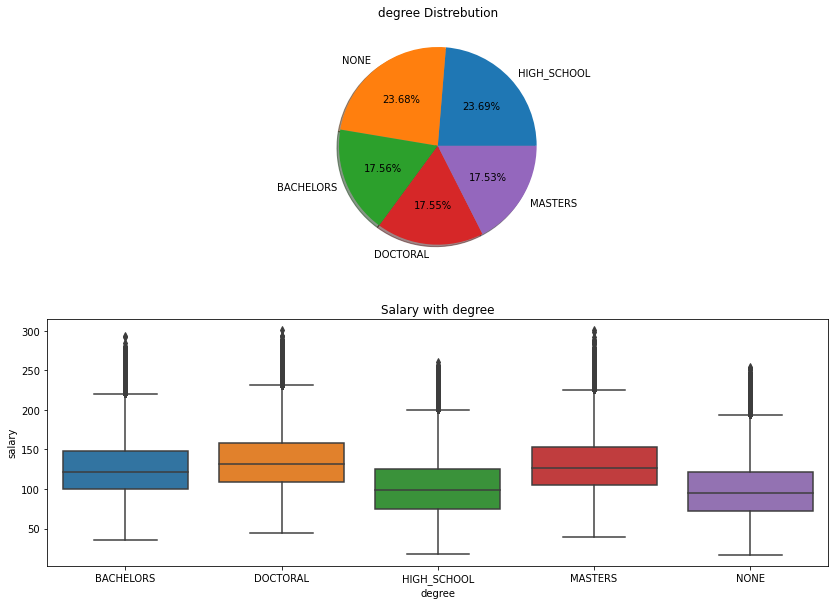

******************************************************************************************************************


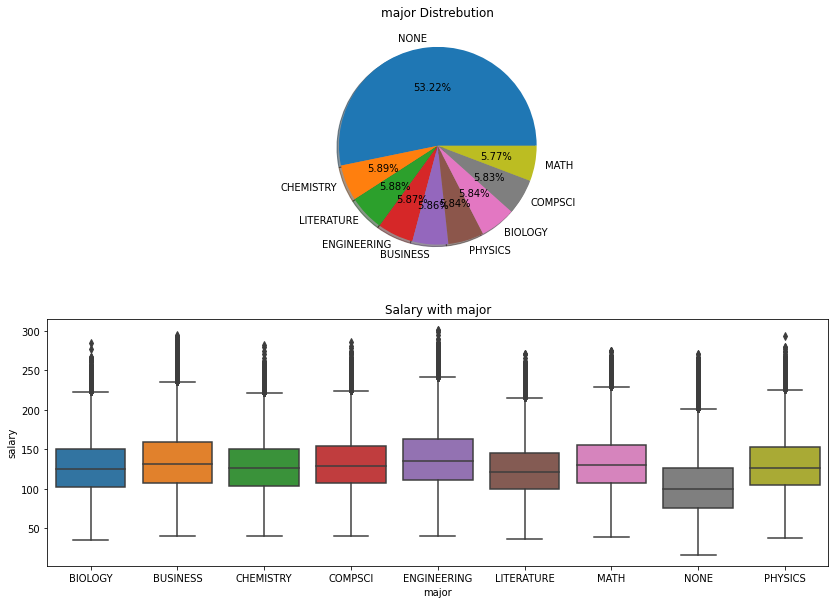

******************************************************************************************************************


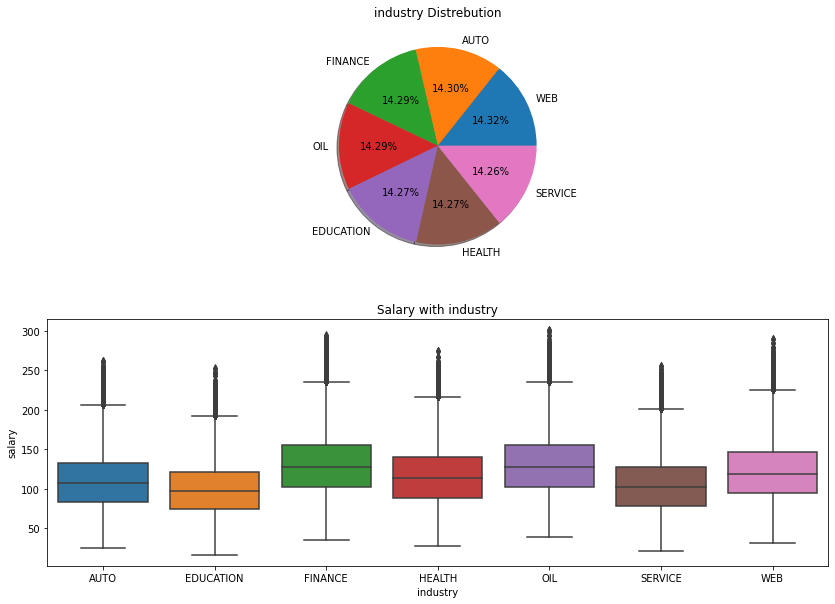

******************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


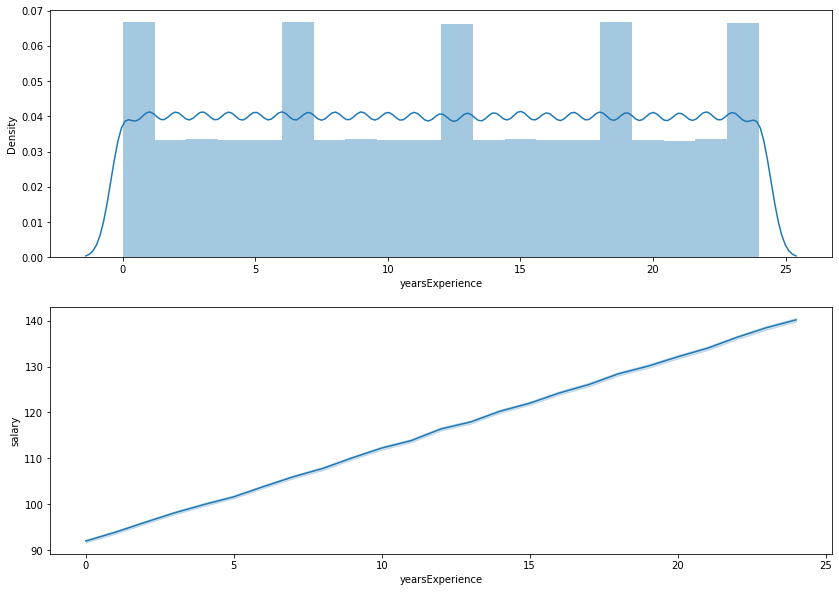

******************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


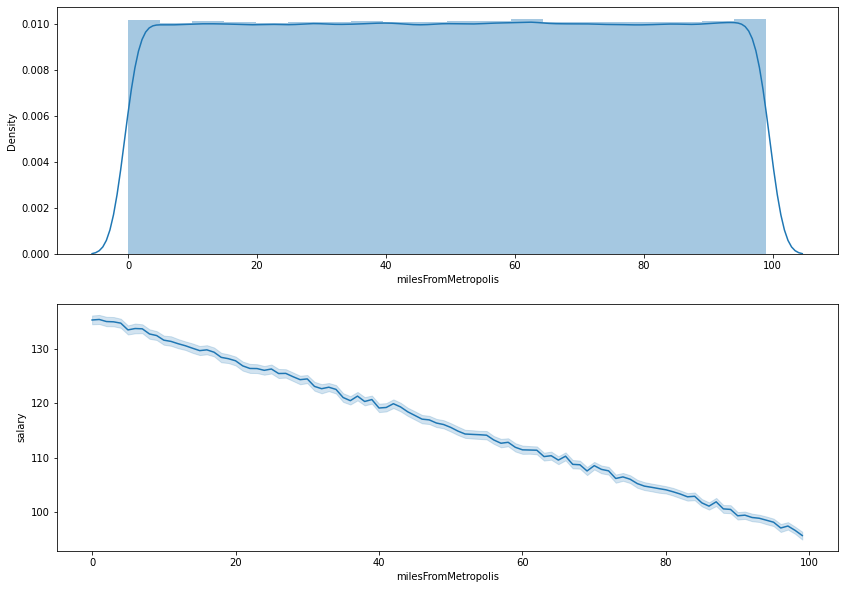

******************************************************************************************************************


In [67]:
# this function work is to plot a specified plot according to the column data type as explained in the above cell
def fetures_visualization(column):
    if jobs_train_df[column].dtype == 'int64':
        plt.figure(figsize = (14,10))
        plt.subplot(2,1,1)
        sns.distplot(jobs_train_df[column], bins = 20)
        plt.subplot(2,1,2)
        sns.lineplot(x = jobs_train_df[column], y = jobs_train_df['salary'], data = jobs_train_df)
        plt.show()
        
    else:
        plt.figure(figsize = (14,10))
        plt.subplot(2,1,1)
        classes_count = jobs_train_df[column].value_counts()  
        plt.pie(classes_count, labels=classes_count.index, shadow=True, autopct='%1.2f%%')
        plt.title(f'{column} Distrebution')
        x1 = jobs_train_df[column]
        plt.subplot(2,1,2)
        sns.boxplot(x = x1, y = jobs_train_df['salary'], data = jobs_train_df).set_title(f'Salary with {column}')
        plt.show()
        
    print('******************************************************************************************************************')
 
# define features list to pass it to our plot function 
features_list = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
# call plot function
for feature in features_list:
    fetures_visualization(feature)

### 3- Study features correlation

**Features Encoding**

in order to plot heatmap we need to encode our categorical features

In [68]:
# define a deep copy of our dataset then encode it
jobs_train_df2 = copy.deepcopy(jobs_train_df)
cols = jobs_train_df2.select_dtypes(include=['category']).columns.to_list()
for col in cols:
    le = preprocessing.LabelEncoder()
    le.fit(jobs_train_df2[col])
    jobs_train_df2[col+'_encoded'] = le.transform(jobs_train_df2[col])

jobs_train_df2

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,companyId_encoded,jobType_encoded,degree_encoded,major_encoded,industry_encoded
0,COMP14,MANAGER,MASTERS,MATH,FINANCE,24,36,158,6,5,3,6,2
1,COMP36,JANITOR,NONE,NONE,FINANCE,3,4,73,30,3,4,7,2
2,COMP56,MANAGER,HIGH_SCHOOL,NONE,SERVICE,11,23,103,52,5,2,7,5
3,COMP28,JANITOR,NONE,NONE,EDUCATION,22,42,63,21,3,4,7,1
4,COMP48,CEO,DOCTORAL,NONE,OIL,15,66,129,43,0,1,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,COMP41,CEO,BACHELORS,COMPSCI,AUTO,21,40,127,36,0,0,3,0
899996,COMP54,CTO,BACHELORS,NONE,WEB,20,24,129,50,2,0,7,6
899997,COMP40,SENIOR,HIGH_SCHOOL,NONE,AUTO,21,48,127,35,6,2,7,0
899998,COMP2,JANITOR,HIGH_SCHOOL,NONE,HEALTH,5,78,46,12,3,2,7,3


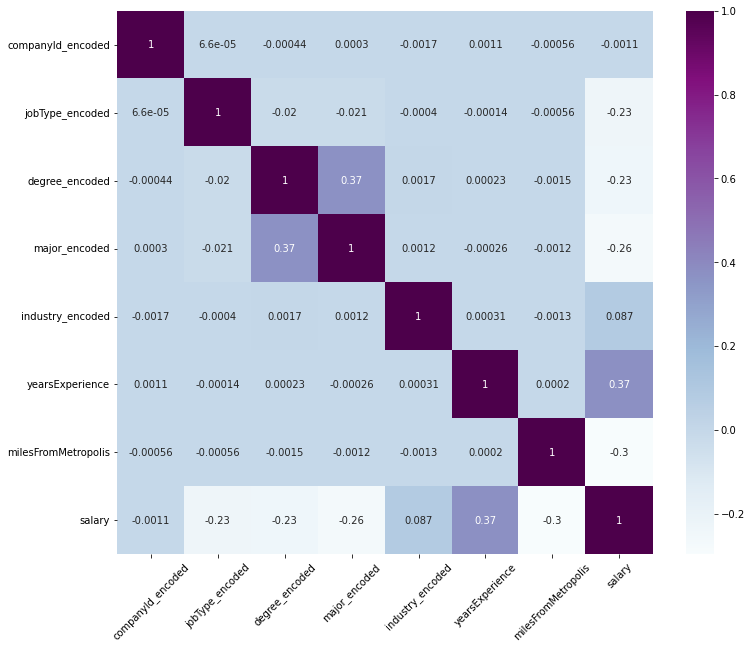

In [69]:
# plot heatmap with the encoded dataset
fig = plt.figure(figsize = (12,10))
features = ['companyId_encoded', 'jobType_encoded', 'degree_encoded', 'major_encoded', 'industry_encoded', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(jobs_train_df2[features + ['salary']].corr(), cmap = 'BuPu', annot=True)
plt.xticks(rotation = 45)
plt.show()

## Fit the dataset to match the learning algorithm needs then split it

### 1- Apply OneHotEncoding on categorical features

In [70]:
# apply oneHotEncoding
categorical_columns = ['companyId', 'jobType', 'degree', 'major', 'industry']

for column in categorical_columns:
    tempdf = pd.get_dummies(jobs_train_df[column], prefix=column)

    jobs_train_df = pd.merge(
        left=jobs_train_df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )

    jobs_train_df = jobs_train_df.drop(columns=column)

print(jobs_train_df)

        yearsExperience  milesFromMetropolis  ...  industry_SERVICE  industry_WEB
0                    24                   36  ...                 0             0
1                     3                    4  ...                 0             0
2                    11                   23  ...                 1             0
3                    22                   42  ...                 0             0
4                    15                   66  ...                 0             0
...                 ...                  ...  ...               ...           ...
899995               21                   40  ...                 0             0
899996               20                   24  ...                 0             1
899997               21                   48  ...                 0             0
899998                5                   78  ...                 0             0
899999               22                   64  ...                 0             0

[899995 rows x 

In [78]:
jobs_train_df

,yearsExperience,milesFromMetropolis,salary,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,companyId_COMP18,companyId_COMP19,companyId_COMP2,companyId_COMP20,companyId_COMP21,companyId_COMP22,companyId_COMP23,companyId_COMP24,companyId_COMP25,companyId_COMP26,companyId_COMP27,companyId_COMP28,companyId_COMP29,companyId_COMP3,companyId_COMP30,companyId_COMP31,companyId_COMP32,companyId_COMP33,companyId_COMP34,companyId_COMP35,companyId_COMP36,companyId_COMP37,companyId_COMP38,companyId_COMP39,companyId_COMP4,companyId_COMP40,companyId_COMP41,...,companyId_COMP56,companyId_COMP57,companyId_COMP58,companyId_COMP59,companyId_COMP6,companyId_COMP60,companyId_COMP61,companyId_COMP62,companyId_COMP7,companyId_COMP8,companyId_COMP9,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,24,36,158,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,3,4,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,11,23,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,22,42,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,15,66,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,21,40,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
899996,20,24,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
899997,21,48,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
899998,5,78,46,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


2- Split the dataset into trainig and test sets 

In [71]:
# split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(jobs_train_df.drop(columns=['salary']), jobs_train_df[['salary']], test_size=0.2)

## Modeling

we are going to apply the following regression algoritms and print their MSE to find the best one:



1.   LinearRegression
2.   SGDRegressor
2.   GradientBoostingRegressor
3.   DecisionTreeRegressor
4.   RandomForestRegressor



In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)
print('LinearRegression Mean Square Error')
print(metrics.mean_squared_error (y_test, lr_y_pred))
print()

LinearRegression Mean Square Error
385.35978670344065



In [74]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

dt_y_pred = regressor.predict(X_test)
print('DecisionTreeRegressor Mean Square Error')
print(metrics.mean_squared_error (y_test, dt_y_pred))
print()

DecisionTreeRegressor Mean Square Error
700.4818506707753



In [75]:
SGD_regressor = SGDRegressor(learning_rate='invscaling', max_iter=1000)
SGD_regressor.fit(X_train, y_train)

SGD_y_pred = SGD_regressor.predict(X_test)

print('SGDRegressor Mean Square Error')
print(metrics.mean_squared_error (y_test, SGD_y_pred))
print()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor Mean Square Error
9658.028761674022



In [76]:
gbm = GradientBoostingRegressor(n_estimators = 40, max_depth = 7, loss = 'ls', verbose = 0)
gbm.fit(X_train, y_train)

gbm_y_pred = gbm.predict(X_test)

print('GradientBoostingRegressor Mean Square Error')
print(metrics.mean_squared_error (y_test, gbm_y_pred))
print()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor Mean Square Error
375.3259007067272



In [77]:
rf = RandomForestRegressor(n_estimators = 80, max_depth = 20, min_samples_split = 70,
                          max_features = 7, verbose = 0)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

print('RandomForestRegressor Mean Square Error')
print(metrics.mean_squared_error (y_test, rf_y_pred))
print()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor Mean Square Error
448.13515317781844



- **Second part:** Best model usage.

It is not right but just for applying purposes I am going to use the same dataset after deleting the salary column

In [79]:
# read the dataset
# data_path = 'jobs_train_edit.csv'
#jobs_train_df = pd.read_csv(data_path)
salary_predict_df = pd.read_csv('jobs_train_edit.csv')

In [80]:
convert_to_category(salary_predict_df, ['companyId', 'jobType', 'degree', 'major', 'industry'])


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685006848,COMP14,MANAGER,MASTERS,MATH,FINANCE,24,36
1,JOB1362685403468,COMP36,JANITOR,NONE,NONE,FINANCE,3,4
2,JOB1362684563560,COMP56,MANAGER,HIGH_SCHOOL,NONE,SERVICE,11,23
3,JOB1362684814664,COMP28,JANITOR,NONE,NONE,EDUCATION,22,42
4,JOB1362685123815,COMP48,CEO,DOCTORAL,NONE,OIL,15,66
...,...,...,...,...,...,...,...,...
899995,JOB1362685208051,COMP41,CEO,BACHELORS,COMPSCI,AUTO,21,40
899996,JOB1362684496156,COMP54,CTO,BACHELORS,NONE,WEB,20,24
899997,JOB1362685401145,COMP40,SENIOR,HIGH_SCHOOL,NONE,AUTO,21,48
899998,JOB1362684627870,COMP2,JANITOR,HIGH_SCHOOL,NONE,HEALTH,5,78


In [81]:
# Drop Unnecessary Columns
salary_predict_df = salary_predict_df.drop(columns=['jobId'])

In [83]:
# apply oneHotEncoding
categorical_columns = ['companyId', 'jobType', 'degree', 'major', 'industry']

for column in categorical_columns:
    tempdf2 = pd.get_dummies(salary_predict_df[column], prefix=column)

    salary_predict_df = pd.merge(
        left=salary_predict_df,
        right=tempdf2,
        left_index=True,
        right_index=True,
    )

    salary_predict_df = salary_predict_df.drop(columns=column)

print(salary_predict_df)

        yearsExperience  milesFromMetropolis  ...  industry_SERVICE  industry_WEB
0                    24                   36  ...                 0             0
1                     3                    4  ...                 0             0
2                    11                   23  ...                 1             0
3                    22                   42  ...                 0             0
4                    15                   66  ...                 0             0
...                 ...                  ...  ...               ...           ...
899995               21                   40  ...                 0             0
899996               20                   24  ...                 0             1
899997               21                   48  ...                 0             0
899998                5                   78  ...                 0             0
899999               22                   64  ...                 0             0

[900000 rows x 

In [84]:
salary_predict_df ['salary'] = gbm.predict(salary_predict_df)

In [85]:
salary_predict_df

,yearsExperience,milesFromMetropolis,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,companyId_COMP18,companyId_COMP19,companyId_COMP2,companyId_COMP20,companyId_COMP21,companyId_COMP22,companyId_COMP23,companyId_COMP24,companyId_COMP25,companyId_COMP26,companyId_COMP27,companyId_COMP28,companyId_COMP29,companyId_COMP3,companyId_COMP30,companyId_COMP31,companyId_COMP32,companyId_COMP33,companyId_COMP34,companyId_COMP35,companyId_COMP36,companyId_COMP37,companyId_COMP38,companyId_COMP39,companyId_COMP4,companyId_COMP40,companyId_COMP41,companyId_COMP42,...,companyId_COMP57,companyId_COMP58,companyId_COMP59,companyId_COMP6,companyId_COMP60,companyId_COMP61,companyId_COMP62,companyId_COMP7,companyId_COMP8,companyId_COMP9,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,salary
0,24,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,165.575304
1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,78.913405
2,11,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,106.547512
3,22,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,79.218388
4,15,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,157.023594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,21,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,163.452439
899996,20,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,158.060030
899997,21,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,113.144092
899998,5,78,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,50.812784
